In [8]:
import cv2
from PIL import Image
import numpy as np
from tqdm import *
import matplotlib.pyplot as plt

BLOCK_SIZE = 7
SEARCH_BLOCK_SIZE = 56

def _read_left_right_image_pair(left_image_path="data/left.png",
                                right_image_path="data/right.png"):

    left_im = cv2.imread("/home/sakshi/Downloads/cones-png-2/cones/im2.png",0)
    right_im = cv2.imread("/home/sakshi/Downloads/cones-png-2/cones/im6.png",0)
    #display_image(left_im, 'left_im')
    #display_image(right_im, 'right_im')
    # Convert image to array
    left_im_array = np.asarray(left_im)
    right_im_array = np.asarray(right_im)
    print(left_im_array.shape)
    print(right_im_array.shape)

    return left_im_array, right_im_array


def display_image(img, window_name='img'):
    cv2.imshow(window_name, img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


def sum_of_abs_diff(pixel_vals_1, pixel_vals_2):
    """
    Args:
        pixel_vals_1 (numpy.ndarray): pixel block from left image
        pixel_vals_2 (numpy.ndarray): pixel block from right image
    Returns:
        float: Sum of absolute difference between individual pixels
    """
    if pixel_vals_1.shape != pixel_vals_2.shape:
        return -1

    return np.sum(abs(pixel_vals_1 - pixel_vals_2))


def compare_blocks(y, x, block_left, right_array, block_size=5):
    """
    Compare left block of pixels with multiple blocks from the right
    image using SEARCH_BLOCK_SIZE to constrain the search in the right
    image.
    Args:
        y (int): row index of the left block
        x (int): column index of the left block
        block_left (numpy.ndarray): containing pixel values within the 
                    block selected from the left image
        right_array (numpy.ndarray]): containing pixel values for the 
                     entrire right image
        block_size (int, optional): Block of pixels width and height. 
                                    Defaults to 5.
    Returns:
        tuple: (y, x) row and column index of the best matching block 
                in the right image
    """
    # Get search range for the right image
    x_min = max(0, x - SEARCH_BLOCK_SIZE)
    x_max = min(right_array.shape[1], x + SEARCH_BLOCK_SIZE)
    #print(f'search bounding box: ({y, x_min}, ({y, x_max}))')
    first = True
    min_sad = None
    min_index = None
    for x in range(x_min, x_max):
        block_right = right_array[y: y+block_size,
                                  x: x+block_size]
        sad = sum_of_abs_diff(block_left, block_right)
        #print(f'sad: {sad}, {y, x}')
        if first:
            min_sad = sad
            min_index = (y, x)
            first = False
        else:
            if sad < min_sad:
                min_sad = sad
                min_index = (y, x)

    return min_index


def right_image_block(x, y):
    left_array, right_array = _read_left_right_image_pair()
    right_im = cv2.imread("data/right.png", 0)
    x_min = max(0, x - 50)
    x_max = min(right_array.shape[1], x + 25)
    right_im_bbox = cv2.rectangle(right_im, (x_min, y),
                                  (x_max, y + 25),
                                  (0, 0, 255), 2)
    display_image(right_im_bbox, window_name='right')


def get_disparity_map():
    left_array, right_array = _read_left_right_image_pair()
    left_array = left_array.astype(int)
    right_array = right_array.astype(int)
    if left_array.shape != right_array.shape:
        raise "Left-Right image shape mismatch!"
    h, w = left_array.shape
    # left_im = cv2.imread("data/left.png", 0)
    disparity_map = np.zeros((h, w))
    # Go over each pixel position
    for y in tqdm(range(BLOCK_SIZE, h-BLOCK_SIZE)):
        for x in range(BLOCK_SIZE, w-BLOCK_SIZE):
            block_left = left_array[y:y + BLOCK_SIZE,
                                    x:x + BLOCK_SIZE]
            min_index = compare_blocks(y, x, block_left,
                                       right_array,
                                       block_size=BLOCK_SIZE)
            disparity_map[y, x] = abs(min_index[1] - x)
            # Debug section to visualize the blocks on the image
            # left_im_bbox = cv2.rectangle(left_im, (x, y),
            #                              (x + 25, y + 25),
            #                              (0, 0, 255), 2)
            # display_image(left_im_bbox, window_name='left')
            # print(left_array[y:y+25, x:x+25])
            # right_image_block(x, y)

    print(disparity_map)
    plt.imshow(disparity_map, cmap='hot', interpolation='nearest')
    plt.savefig('depth_image.png')
    plt.show()
    # img = Image.fromarray(disparity_map, 'L')
    # img.show()


if __name__ == '__main__':
    get_disparity_map()

SyntaxError: invalid character in identifier (<ipython-input-8-4db1be255d5e>, line 142)

In [2]:
def sum_of_abs_diff(pixel_vals_1, pixel_vals_2):
    """
    Args:
        pixel_vals_1 (numpy.ndarray): pixel block from left image
        pixel_vals_2 (numpy.ndarray): pixel block from right image

    Returns:
        float: Sum of absolute difference between individual pixels
    """
    if pixel_vals_1.shape != pixel_vals_2.shape:
        return -1

    return np.sum(abs(pixel_vals_1 - pixel_vals_2))

In [3]:
BLOCK_SIZE = 7
SEARCH_BLOCK_SIZE = 56

def compare_blocks(y, x, block_left, right_array, block_size=5):
    """
    Compare left block of pixels with multiple blocks from the right
    image using SEARCH_BLOCK_SIZE to constrain the search in the right
    image.

    Args:
        y (int): row index of the left block
        x (int): column index of the left block
        block_left (numpy.ndarray): containing pixel values within the 
                    block selected from the left image
        right_array (numpy.ndarray]): containing pixel values for the 
                     entrire right image
        block_size (int, optional): Block of pixels width and height. 
                                    Defaults to 5.

    Returns:
        tuple: (y, x) row and column index of the best matching block 
                in the right image
    """
    # Get search range for the right image
    x_min = max(0, x - SEARCH_BLOCK_SIZE)
    x_max = min(right_array.shape[1], x + SEARCH_BLOCK_SIZE)
    #print(f'search bounding box: ({y, x_min}, ({y, x_max}))')
    first = True
    min_sad = None
    min_index = None
    for x in range(x_min, x_max):
        block_right = right_array[y: y+block_size,
                                  x: x+block_size]
        sad = sum_of_abs_diff(block_left, block_right)
        #print(f'sad: {sad}, {y, x}')
        if first:
            min_sad = sad
            min_index = (y, x)
            first = False
        else:
            if sad < min_sad:
                min_sad = sad
                min_index = (y, x)

    return min_index

In [6]:
image1 = cv2.imread("/home/sakshi/Downloads/cones-png-2/cones/im2.png",0)
image2 = cv2.imread("/home/sakshi/Downloads/cones-png-2/cones/im6.png",0)
left_im_array = np.asarray(image1)
right_im_array = np.asarray(image2)
print(left_im_array.shape)
print(right_im_array.shape)
h, w = image1.shape
disparity_map = np.zeros((h, w))

(375, 450)
(375, 450)


100%|██████████| 361/361 [02:10<00:00,  2.76it/s]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


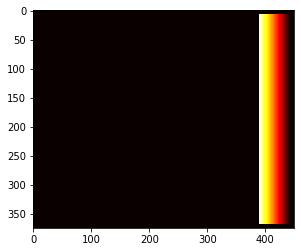

In [7]:

left_array = left_im_array.astype(int)
right_array = left_im_array.astype(int)
if left_array.shape != right_array.shape:
    raise "Left-Right image shape mismatch!"
h, w = left_array.shape
# left_im = cv2.imread("data/left.png", 0)
disparity_map = np.zeros((h, w))
# Go over each pixel position
for y in tqdm(range(BLOCK_SIZE, h-BLOCK_SIZE)):
    for x in range(BLOCK_SIZE, w-BLOCK_SIZE):
        block_left = left_array[y:y + BLOCK_SIZE,
                                x:x + BLOCK_SIZE]
        min_index = compare_blocks(y, x, block_left,
                                    right_array,
                                    block_size=BLOCK_SIZE)
        disparity_map[y, x] = abs(min_index[1] - x)
print(disparity_map)
plt.imshow(disparity_map, cmap='hot', interpolation='nearest')
plt.savefig('depth_image.png')
plt.show()